In [1]:
import pandas as pd
import numpy as np 
import nltk
import string
import seaborn as sns

from wordcloud import WordCloud
from nltk.corpus import stopwords


In [40]:
data = pd.read_csv('twitter.csv')
data.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [41]:
data.shape

(14640, 15)

In [42]:
data_conf = data[data['airline_sentiment_confidence'] == 1] 
data_conf.shape

(10445, 15)

In [43]:
data['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [44]:
data_conf['airline_sentiment'].value_counts()

negative    7382
neutral     1548
positive    1515
Name: airline_sentiment, dtype: int64

In [45]:
data['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [46]:
data_conf['airline'].value_counts()

United            2738
US Airways        2258
American          2091
Southwest         1633
Delta             1400
Virgin America     325
Name: airline, dtype: int64

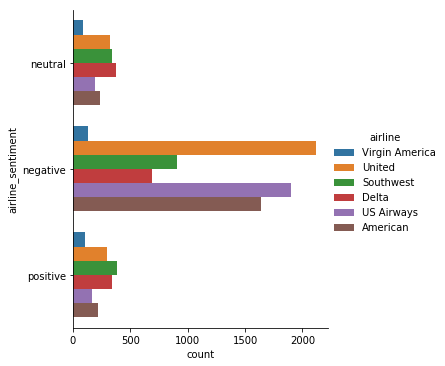

In [47]:
sns.catplot(y="airline_sentiment", hue="airline", kind="count",data=data_conf);

In [48]:
pd.pivot_table(data_conf,index=['airline'],columns = ['airline_sentiment' ],values = ['airline_sentiment_confidence'], aggfunc = [len])

len                 
                  airline_sentiment_confidence                 
airline_sentiment                     negative neutral positive
airline                                                        
American                                1635.0   235.0    221.0
Delta                                    688.0   374.0    338.0
Southwest                                909.0   337.0    387.0
US Airways                              1901.0   190.0    167.0
United                                  2120.0   320.0    298.0
Virgin America                           129.0    92.0    104.0

In [49]:
def opinion(row):
    if (row['airline_sentiment'] == 'positive' or row['airline_sentiment'] == 'neutral'):
        return 0
    else:
        return 1

data_conf['Opinion'] = data_conf.apply(opinion, axis=1)    

data_conf = data_conf.drop(data_conf.columns[:9],axis=1) 

data_conf = data_conf.drop(data_conf.columns[[0,2,3,4,5]],axis=1) 
data_conf.head()

C:\Users\Pateczka\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


text  Opinion
0                @VirginAmerica What @dhepburn said.        0
3  @VirginAmerica it's really aggressive to blast...        1
4  @VirginAmerica and it's a really big bad thing...        1
5  @VirginAmerica seriously would pay $30 a fligh...        1
9  @VirginAmerica it was amazing, and arrived an ...        0

In [50]:
data_conf['text'] = data_conf['text'].str.lower()
data_conf.head()

text  Opinion
0                @virginamerica what @dhepburn said.        0
3  @virginamerica it's really aggressive to blast...        1
4  @virginamerica and it's a really big bad thing...        1
5  @virginamerica seriously would pay $30 a fligh...        1
9  @virginamerica it was amazing, and arrived an ...        0

In [53]:
import re
#remove words which are starts with @ symbols
data_conf['text'] = data_conf['text'].map(lambda x:re.sub('@\w*','',str(x)))
data_conf.head()


text  Opinion
0                                        what  said.        0
3   it's really aggressive to blast obnoxious "en...        1
4           and it's a really big bad thing about it        1
5   seriously would pay $30 a flight for seats th...        1
9   it was amazing, and arrived an hour early. yo...        0

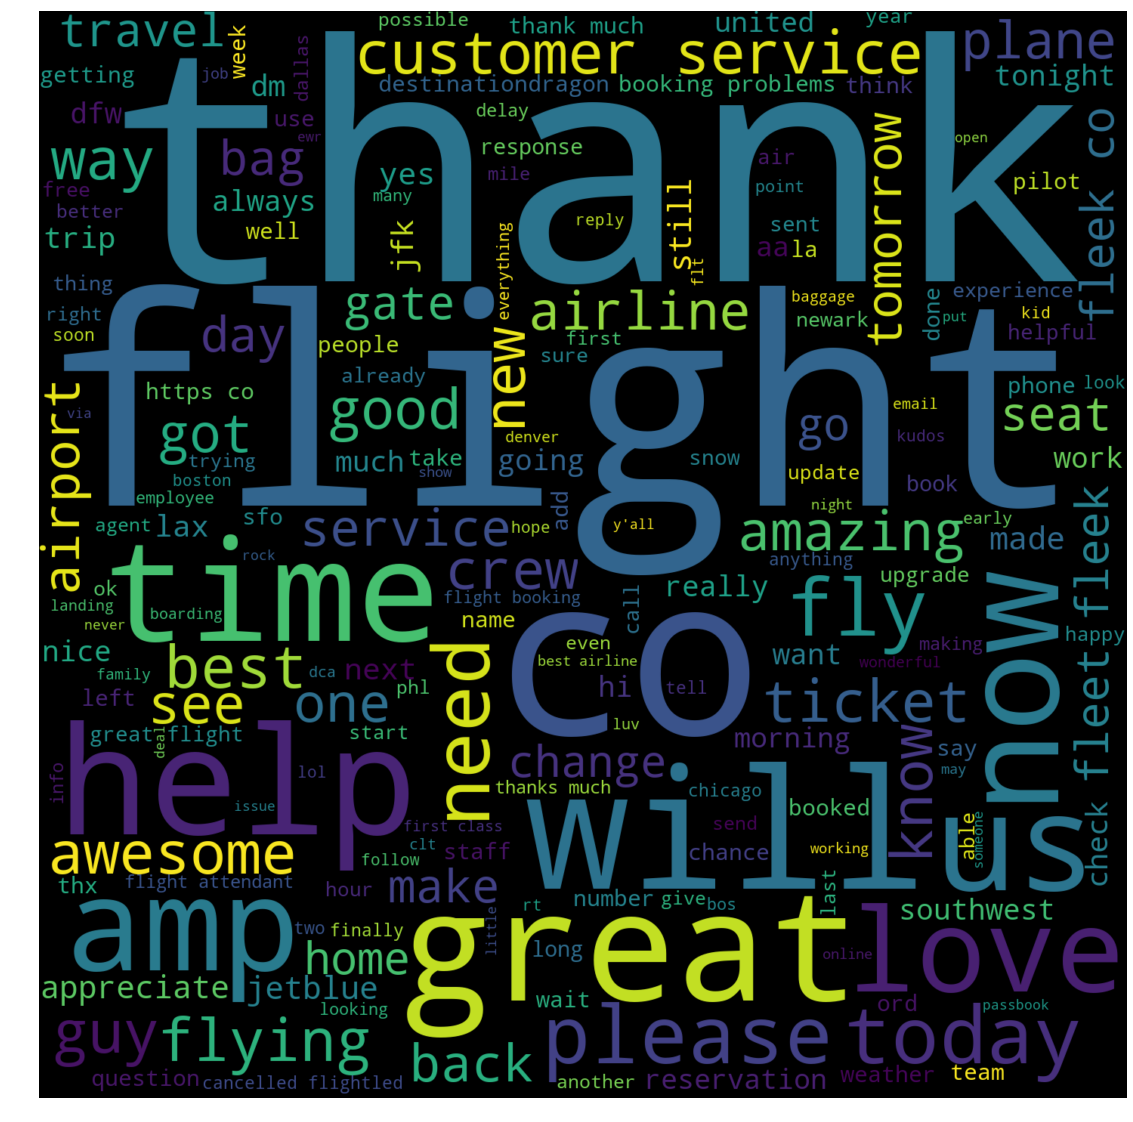

In [54]:
import matplotlib.pyplot as plt
positive = ' '.join(list(data_conf[data_conf['Opinion'] ==0]['text']))
pos_wc = WordCloud(width = 1440, height = 1440).generate(positive)
plt.figure(figsize=(20,20))
plt.imshow(pos_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

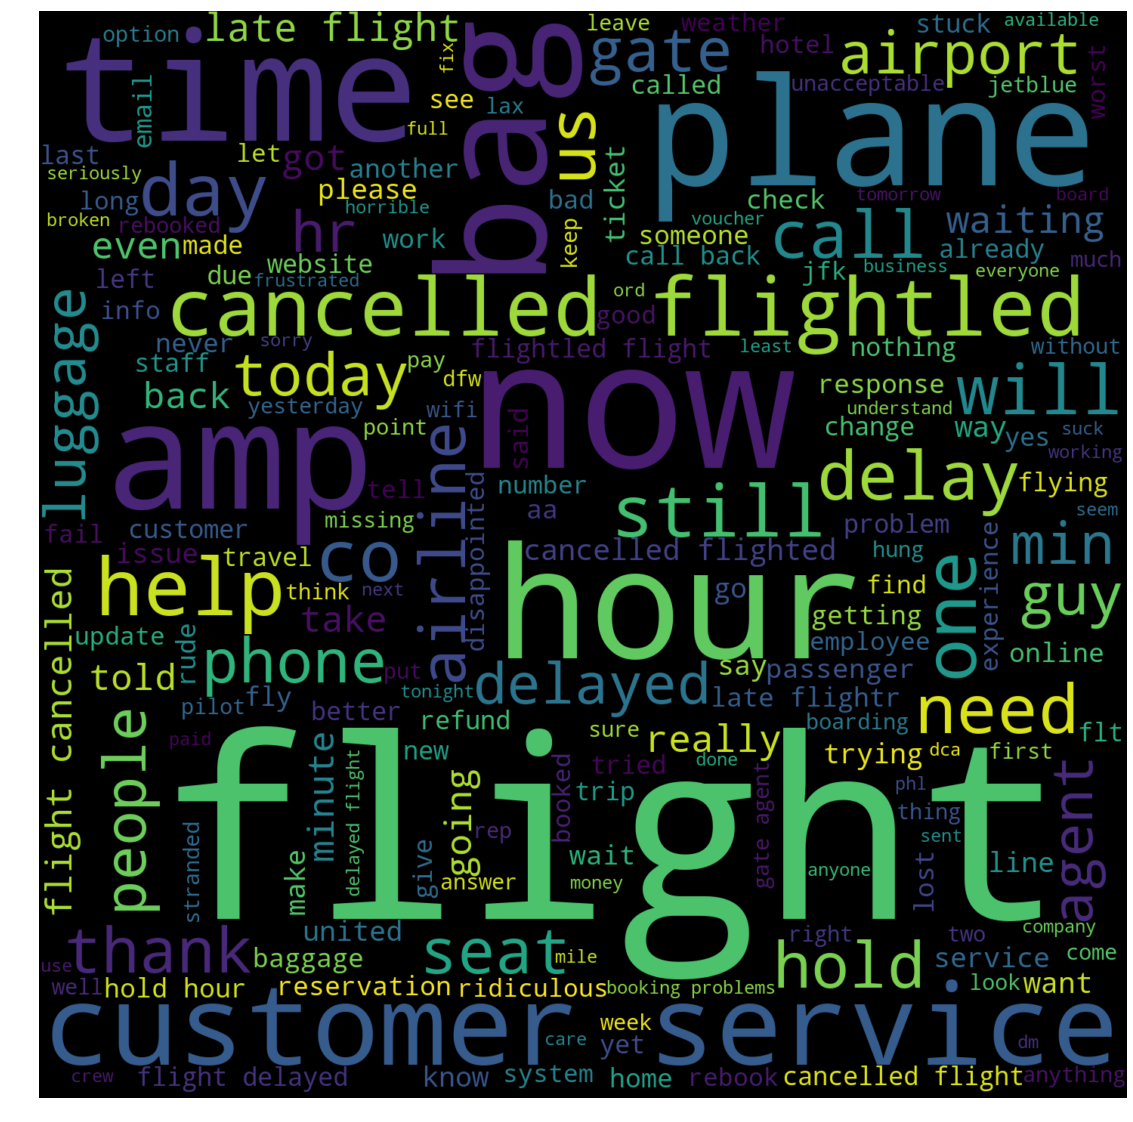

In [55]:
negative = ' '.join(list(data_conf[data_conf['Opinion'] ==1]['text']))
neg_wc = WordCloud(width = 1440, height = 1440).generate(negative)
plt.figure(figsize=(20,20))
plt.imshow(neg_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [72]:
import numpy as np 
import pandas as pd 
import nltk
from nltk.corpus import stopwords
import string

import warnings
warnings.filterwarnings('ignore')

In [57]:
#Need to download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pateczka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [58]:
#Tokenization (a list of tokens), will be used as the analyzer
#1.Punctuations are [!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]
#2.Stop words in natural language processing, are useless words (data).
def process_text(text):
    #1
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    #2
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    #3
    return clean_words

In [59]:
#Show the Tokenization (a list of tokens )
data_conf['text'].head().apply(process_text)

0                                               [said]
3    [really, aggressive, blast, obnoxious, enterta...
4                            [really, big, bad, thing]
5    [seriously, would, pay, 30, flight, seats, did...
9         [amazing, arrived, hour, early, youre, good]
Name: text, dtype: object

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
messages_bow = CountVectorizer(analyzer=process_text).fit_transform(data_conf['text'])


In [61]:
messages_bow

<10445x13078 sparse matrix of type '<class 'numpy.int64'>'
	with 99579 stored elements in Compressed Sparse Row format>

In [62]:
#Split data into 80% training & 20% testing data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(messages_bow, data_conf['Opinion'], test_size = 0.20, random_state = 123)

In [63]:
y_test.shape

(2089,)

In [64]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [65]:
#Evaluate the model on the training data set
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = classifier.predict(X_train)
print(classification_report(y_train ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
print()
print('Accuracy: ', accuracy_score(y_train,pred))

              precision    recall  f1-score   support

           0       0.96      0.77      0.86      2477
           1       0.91      0.99      0.95      5879

   micro avg       0.92      0.92      0.92      8356
   macro avg       0.94      0.88      0.90      8356
weighted avg       0.93      0.92      0.92      8356

Confusion Matrix: 
 [[1917  560]
 [  74 5805]]

Accuracy:  0.9241263762565821


In [66]:
pred = classifier.predict(X_test)
print(classification_report(y_test ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_test,pred))
print()
print('Accuracy: ', accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.65      0.74       586
           1       0.88      0.95      0.91      1503

   micro avg       0.87      0.87      0.87      2089
   macro avg       0.86      0.80      0.82      2089
weighted avg       0.87      0.87      0.86      2089

Confusion Matrix: 
 [[ 383  203]
 [  71 1432]]

Accuracy:  0.8688367640019148


In [69]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

C:\Users\Pateczka\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [70]:
#Evaluate the model on the training data set
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = classifier.predict(X_train)
print(classification_report(y_train ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
print()
print('Accuracy: ', accuracy_score(y_train,pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2477
           1       1.00      0.99      1.00      5879

   micro avg       0.99      0.99      0.99      8356
   macro avg       0.99      0.99      0.99      8356
weighted avg       0.99      0.99      0.99      8356

Confusion Matrix: 
 [[2458   19]
 [  39 5840]]

Accuracy:  0.9930588798468166


In [71]:
pred = classifier.predict(X_test)
print(classification_report(y_test ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_test,pred))
print()
print('Accuracy: ', accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74       586
           1       0.90      0.89      0.90      1503

   micro avg       0.85      0.85      0.85      2089
   macro avg       0.82      0.82      0.82      2089
weighted avg       0.85      0.85      0.85      2089

Confusion Matrix: 
 [[ 436  150]
 [ 160 1343]]

Accuracy:  0.8516036381043561


In [73]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [76]:
# teraz wyuczę różne algorytmy klasyfikujące

# Klasyfikator SGD
sgd = linear_model.SGDClassifier()
sgd.fit(X_train, y_train)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)

# Klasyfikator las losowy
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

# Regresja logistyczna
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)

# Klasyfikator k - najbliższych sasiadów
knn = KNeighborsClassifier() 
knn.fit(X_train, y_train)  
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

# Maszyna wektorów nośnych
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

# drzewo decyzyjne
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

In [77]:
# zebranie wyników w jeden obiekt dataframe
wyniki = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest,
              acc_sgd, acc_decision_tree]})
wyniki_df = wyniki.sort_values(by='Score', ascending=False)
wyniki_df = wyniki_df.set_index('Score')
wyniki_df.head(7)

Model
Score                            
99.98               Decision Tree
99.65     Support Vector Machines
99.27               Random Forest
97.20         Logistic Regression
97.01  Stochastic Gradient Decent
66.68                         KNN

In [79]:
pred_sgd = sgd.predict(X_test)

pred_forest = random_forest.predict(X_test)

pred_logreg = logreg.predict(X_test)

pred_knn = knn.predict(X_test)

pred_linear_svc = linear_svc.predict(X_test)

pred_tree = decision_tree.predict(X_test)




In [80]:
# zebranie wyników w jeden obiekt dataframe
wyniki = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [accuracy_score(y_test,pred_linear_svc),accuracy_score(y_test,pred_knn) , accuracy_score(y_test,pred_logreg), 
              accuracy_score(y_test,pred_forest),
              accuracy_score(y_test,pred_sgd), accuracy_score(y_test,pred_tree)]})
wyniki_df = wyniki.sort_values(by='Score', ascending=False)
wyniki_df = wyniki_df.set_index('Score')
wyniki_df.head(6)

Model
Score                               
0.888942         Logistic Regression
0.876017  Stochastic Gradient Decent
0.872666     Support Vector Machines
0.858305               Random Forest
0.835807               Decision Tree
0.543801                         KNN